In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

instance = 'pr01'
m = 1

# Load the CSV files
csv_a = pd.read_csv('./build/output/aws/release_benchmarks.csv', delimiter=',')
csv_b = pd.read_csv('./build/output/aws/release-no-history_benchmarks.csv', delimiter=',')
csv_c = pd.read_csv('./build/output/aws/release-equal-intervals_benchmarks.csv', delimiter=',')
csv_d = pd.read_csv('./build/output/aws/release-simple_benchmarks.csv', delimiter=',')

# Filter data for m=1
csv_a = csv_a.loc[csv_a['m'] == m]
csv_b = csv_b.loc[csv_b['m'] == m]
csv_c = csv_c.loc[csv_c['m'] == m]
csv_d = csv_d.loc[csv_d['m'] == m]

# Select data for the hardcoded instance
pr01_a = csv_a.loc[csv_a['instance'] == instance]
pr01_b = csv_b.loc[csv_b['instance'] == instance]
pr01_c = csv_c.loc[csv_c['instance'] == instance]
pr01_d = csv_d.loc[csv_d['instance'] == instance]

print(pr01_a)
# Plot the first graph
fig, ax1 = plt.subplots()

ax1.set_xlabel('s')
ax1.set_ylabel('score')
ax1.set_xticks(np.arange(1, 5))

ax1.plot(pr01_a['s'], pr01_a['score'], label='csv_a')
ax1.plot(pr01_b['s'], pr01_b['score'], label='csv_b')
ax1.plot(pr01_c['s'], pr01_c['score'], label='csv_c')
ax1.plot(pr01_d['s'], pr01_d['score'], label='csv_d')

ax1.legend()

# Plot the second graph
fig, ax2 = plt.subplots()

ax2.set_xlabel('s')
ax2.set_ylabel('time')
ax2.set_xticks(np.arange(1, 5))

ax2.plot(pr01_a['s'], pr01_a['time'], label='csv_a')
ax2.plot(pr01_b['s'], pr01_b['time'], label='csv_b')
ax2.plot(pr01_c['s'], pr01_c['time'], label='csv_c')
ax2.plot(pr01_d['s'], pr01_d['time'], label='csv_d')

ax2.legend()

plt.show()

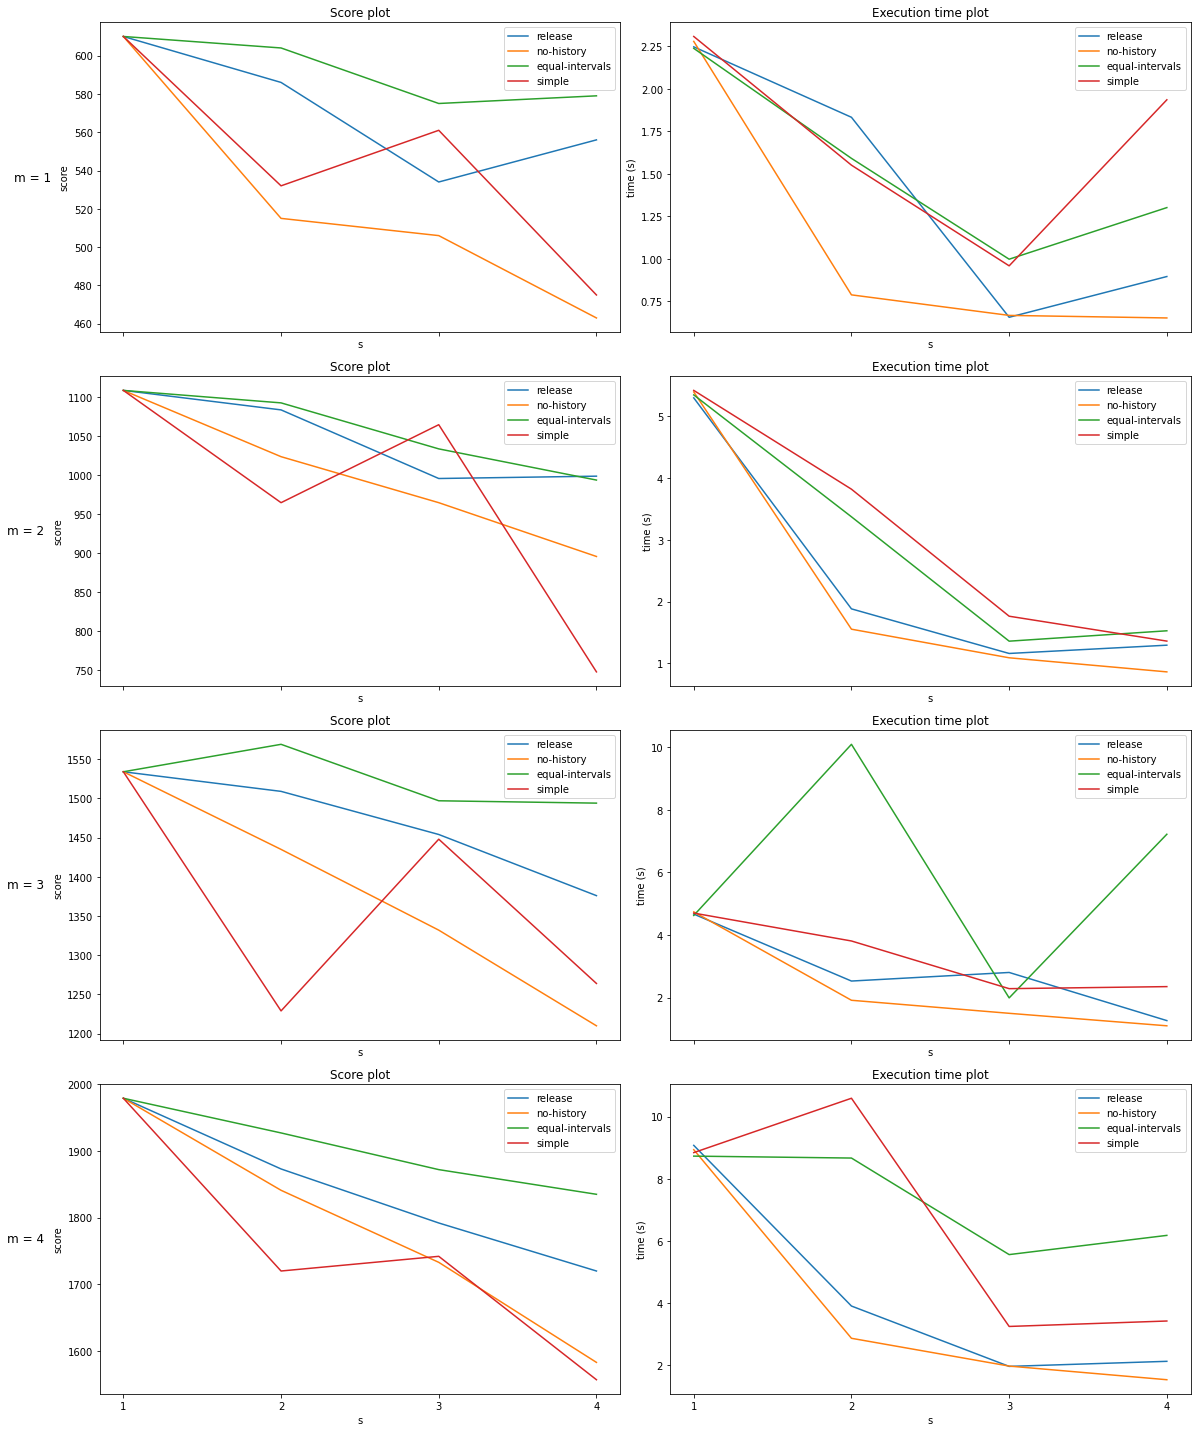

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

instance = 'pr20'
caption = caption = 'Figure 1: Comparison of score and execution time across s values for '+instance+', m='+str(m)

# Create a figure with two subplots
fig, axs = plt.subplots(4, 2, figsize=(18, 20), sharex=True)

# Load the data from CSV files
# Load the CSV files
csv1 = pd.read_csv('./build/output/aws/release_benchmarks.csv', delimiter=',')
csv2 = pd.read_csv('./build/output/aws/release-no-history_benchmarks.csv', delimiter=',')
csv3 = pd.read_csv('./build/output/aws/release-equal-intervals_benchmarks.csv', delimiter=',')
csv4 = pd.read_csv('./build/output/aws/release-simple_benchmarks.csv', delimiter=',')

pad = 5

for m in range(0, 4):
    
    # Filter data for m=1
    df1 = csv1.loc[csv1['m'] == m+1]
    df2 = csv2.loc[csv2['m'] == m+1]
    df3 = csv3.loc[csv3['m'] == m+1]
    df4 = csv4.loc[csv4['m'] == m+1]

    # Select data for the hardcoded instance
    df1 = df1.loc[df1['instance'] == instance]
    df2 = df2.loc[df2['instance'] == instance]
    df3 = df3.loc[df3['instance'] == instance]
    df4 = df4.loc[df4['instance'] == instance]
    
    
    # Plot the score data in the first subplot
    axs[m, 0].plot(df1['s'], df1['score'], label='release')
    axs[m, 0].plot(df2['s'], df2['score'], label='no-history')
    axs[m, 0].plot(df3['s'], df3['score'], label='equal-intervals')
    axs[m, 0].plot(df4['s'], df4['score'], label='simple')
    axs[m, 0].set_xlabel('s')
    axs[m, 0].set_ylabel('score')
    axs[m, 0].set_title('Score plot')
    axs[m, 0].legend()
#     axs[m, 0].label_outer()

    # Plot the execution time data in the second subplot
    axs[m, 1].plot(df1['s'], df1['time'], label='release')
    axs[m, 1].plot(df2['s'], df2['time'], label='no-history')
    axs[m, 1].plot(df3['s'], df3['time'], label='equal-intervals')
    axs[m, 1].plot(df4['s'], df4['time'], label='simple')
    axs[m, 1].set_xlabel('s')
    axs[m, 1].set_ylabel('time (s)')
    axs[m, 1].set_title('Execution time plot')
    axs[m, 1].legend()
#     axs[m, 1].label_outer()

    axs[m, 0].set_xticks(df1['s'].unique())
    axs[m, 1].set_xticks(df1['s'].unique())
    
    axs[m, 0].set_xticks(df2['s'].unique())
    axs[m, 1].set_xticks(df2['s'].unique())
    
    axs[m, 0].set_xticks(df3['s'].unique())
    axs[m, 1].set_xticks(df3['s'].unique())
    
    axs[m, 0].set_xticks(df4['s'].unique())
    axs[m, 1].set_xticks(df4['s'].unique())


rows = ['m = {}'.format(row) for row in range(1, 5)]

for ax, row in zip(axs[:,0], rows):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')

# Adjust the spacing between subplots
fig.tight_layout()

fig.subplots_adjust(left=0.15)

# Show the plot
plt.show()

# Save the figure
# fig.savefig('plot_m'+str(m)+'.png')

   
